# Logistic Regression

In [1]:
## used for classification problem not for regression problem as its name suggests
## Outputs Probability and can be converted into absolute
## L2 default regularizer for logistic regression model.

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data 
cancer = datasets.load_breast_cancer()
X,y = cancer.data,cancer.target

X_df = pd.DataFrame(X, columns= cancer.feature_names)
X_df.head()
#y_df = pd.DataFrame()
#y_df['target'] = y.reshape(-1,1).flatten()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Spliting Data into test and Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state= 100,stratify=y)

1 SIMPLE LOGISTIC REGRESSION ( BINARY CLASS)

In [4]:
# Logistic Regression object 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

R2 = logreg.score(X_test,y_test)
print(" R2 Score = ", R2)

 R2 Score =  0.9532163742690059


2 ADDITIONAL MODEL EVALUATORS

In [5]:
# Log Loss definition

def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

#  minimizing  logloss
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
from scipy.optimize import minimize
w_fit = minimize(my_loss, X[0]).x


In [6]:
# Confusion Matrix and Classification Report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[ 59   5]
 [  3 104]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.94        64
          1       0.95      0.97      0.96       107

avg / total       0.95      0.95      0.95       171



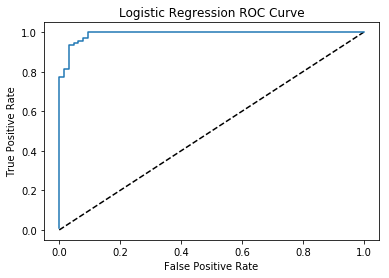

In [7]:
# ROC ( Receiver ooperative characteristic curve ( different points we get when we move p thershold value from 0 to 1)

from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [8]:
# AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC Score = ',auc)

# AUC by Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5,scoring='roc_auc')
print('Cross Validation AUC scores:', cv_scores)

AUC Score =  0.9905081775700935
Cross Validation AUC scores: [0.99450904 0.99192506 0.99731724 0.98256204 0.99664655]


3 FINDIN HYPER PARAMETERS

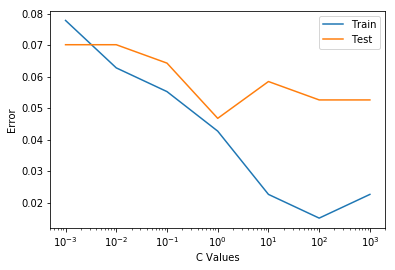

In [9]:
# Finding C value for Regularication by plot

train_errs = list()
valid_errs = list()
C_values =  [1/1000,1/100,1/10,1,10,100,1000]

for C_value in C_values:
    
    lr = LogisticRegression(C= C_value)
    lr.fit(X_train, y_train)


    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_test, y_test))

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.xlabel('C Values')
plt.ylabel('Error')
plt.legend(("Train", "Test"))
plt.show()

In [10]:
# Grid Search cross Validation
# L1 Regularization  ( Also used for feature reduction)
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l1')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
lr_cv = GridSearchCV(lr, param_grid, cv=5)
lr_cv.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", lr_cv.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = lr_cv.best_estimator_
coefs = best_lr.coef_
R2_opt = best_lr.score(X_test,y_test)
print("R2 Optimized = ", R2_opt)
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
R2 Optimized =  0.9473684210526315
Total number of features: 30
Number of selected features: 14
